# NSU, vaje 1: osnove strojnega učenja v Pythonu

In [2]:
import numpy as np
import pandas as pd
import openml as oml



### A: obdelava podatkov
A.1: Naložite podatke iz CSV datoteke s paketom **pandas**. 

In [6]:
dt = pd.read_csv('podatki.csv')
dt = dt.iloc[:, 1:]

A.2: Osnovne informacij o podatkih. Izpišite prvih nekaj vrstic podatkov in si jih oglejte, nato pa izpišite še:
- število vrstic in stolpcev
- vrsto spremenljivke v vsakem stolpcu (v pomoč je funkcija **dtypes**), 
- povzetek statistike (pandas nam pomaga z **describe**), 
- število manjkajočih vrednosti v vsakem stolpcu (koristna je funkcija **isnull**).

In [34]:
print('Stevilo stolpcev:',len(dt.columns), 'Stevilo vrstic:', len(dt))
print(dt.dtypes)
print(dt.describe())
print(dt.isnull().sum())

Stevilo stolpcev: 6 Stevilo vrstic: 500
X1    float64
X2    float64
X3    float64
X4     object
X5    float64
Y       int64
dtype: object
               X1          X2          X3          X5           Y
count  500.000000  500.000000  500.000000  500.000000  500.000000
mean     9.119613   56.382808    9.760390   57.596631    0.376000
std     19.385854   30.719657   20.954165   31.723972    0.484865
min      0.002002    0.185484   -9.974356    0.048450    0.000000
25%      0.293359   30.467127   -4.194132   28.283852    0.000000
50%      0.567208   58.991391    1.731388   61.778805    0.000000
75%      0.874970   87.063210    8.729667   90.510850    1.000000
max     52.524655   99.852905   50.619040   99.584908    1.000000
X1    0
X2    0
X3    0
X4    0
X5    0
Y     0
dtype: int64


A.3: Očistite podatke tako, da odpravite manjkajoče vrednosti. Na stolpcih, v katerih manjka manj kot petina vrednosti, izvedete imputacijo manjkajočih vrednosti s povprečjem oziroma najpogostejšo vrednostjo. Stolpce, v katerih manjka več kot petina vrednosti, odstranite.

In [14]:
for c in dt.columns:
    #print(c, dt.isnull().sum()[c])
    if dt.isnull().sum()[c] < len(dt)/5: 
        try:
            mm = dt[c].describe().mean()
        except TypeError:
            mm = dt[c].mode()[0]
        #print(mm)
        dt[c] = dt[c].fillna(mm)
        #print(dt.isnull().sum())
    else:
        dt = dt.drop(columns=[c])

print(dt.isnull().sum())
print(dt)

X1    0
X2    0
X3    0
X4    0
X5    0
Y     0
dtype: int64
            X1         X2         X3     X4         X5  Y
0     0.452553  69.113756  -2.558555    car  23.210163  1
1     0.865373  39.855286  -0.727901   bike  24.136736  0
2    52.524655  82.321769  -6.092819   bike  70.441331  0
3     0.568116  82.638111  -8.248877    car  93.780130  1
4     0.936621  34.460152  -9.577684    car  46.773121  0
..         ...        ...        ...    ...        ... ..
495   0.062005   1.529036  50.619040  train  96.551636  0
496   0.293445  66.051744   8.402215    car  83.083566  0
497  52.524655  27.250772   7.462399  train  54.262281  0
498  52.524655  45.993650  50.619040  train  84.765766  0
499   0.815238  36.760951  -5.379489    car  18.727611  1

[500 rows x 6 columns]


A.4: Narišite grafe, ki vam bodo pomagali razumeti značilnosti podatkov:
- histogrami značilk in ciljne spremenljivke (pandas nudi **hist**)
- korelacijska matrika (pandas nudi tudi **corr**)

          X1        X2        X3        X5         Y
X1  1.000000  0.015358  0.048065  0.017994  0.019777
X2  0.015358  1.000000  0.000799  0.007191 -0.182243
X3  0.048065  0.000799  1.000000 -0.052600 -0.035309
X5  0.017994  0.007191 -0.052600  1.000000 -0.009618
Y   0.019777 -0.182243 -0.035309 -0.009618  1.000000


/var/folders/xm/sm6v62q54tx5pwxng4_cwyw40000gn/T/ipykernel_33958/1032561457.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(dt.corr())


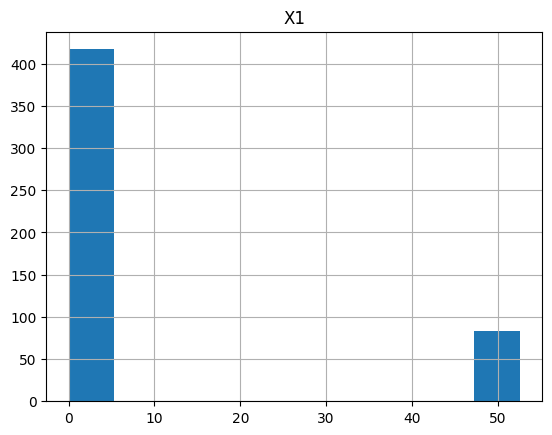

In [17]:
dt.hist(column='X1')
print(dt.corr())

A.5: V nadaljevanju bomo za strojno učenje uporabljali knjižnico **scikit-learn**, ki ima pomembno omejitev: direktno ne podpira kategoričnih značilk, kot je X4 v naših podatkih. Reši to zagato z uporabo kodirnika **sklearn.preprocessing.OneHotEncoder**.

In [18]:
from sklearn.preprocessing import OneHotEncoder

categ_col = dt.columns[dt.dtypes=='object']
enc = OneHotEncoder(sparse=False)

OH_col = enc.fit_transform(dt[categ_col])

OH_col = pd.DataFrame(OH_col, columns=enc.get_feature_names_out())
OH_col.index = dt.index
num_data = dt.drop(categ_col, axis=1)
data = pd.concat([OH_col, num_data], axis=1)
print(data)

     X4_bike  X4_car  X4_train         X1         X2         X3         X5  Y
0        0.0     1.0       0.0   0.452553  69.113756  -2.558555  23.210163  1
1        1.0     0.0       0.0   0.865373  39.855286  -0.727901  24.136736  0
2        1.0     0.0       0.0  52.524655  82.321769  -6.092819  70.441331  0
3        0.0     1.0       0.0   0.568116  82.638111  -8.248877  93.780130  1
4        0.0     1.0       0.0   0.936621  34.460152  -9.577684  46.773121  0
..       ...     ...       ...        ...        ...        ...        ... ..
495      0.0     0.0       1.0   0.062005   1.529036  50.619040  96.551636  0
496      0.0     1.0       0.0   0.293445  66.051744   8.402215  83.083566  0
497      0.0     0.0       1.0  52.524655  27.250772   7.462399  54.262281  0
498      0.0     0.0       1.0  52.524655  45.993650  50.619040  84.765766  0
499      0.0     1.0       0.0   0.815238  36.760951  -5.379489  18.727611  1

[500 rows x 8 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### B: Binarna klasifikacija s scikit-learn

B.1: Na celotnih podatkih natreniraj model najbližjih sosedov (**sklearn.neighbors.KNeighborsClassifier**).

In [19]:
from sklearn.neighbors import KNeighborsClassifier

X = data.drop('Y', axis=1)
Y = data['Y']

knn = KNeighborsClassifier(2)
knn.fit(X, Y)

napoved = knn.predict(X)
acc = sum(napoved == Y)/len(Y)
print(acc)

0.78


B.2: Izračunaj natančnost modela na učni množici (celotnih podatkih).

In [20]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y, napoved)
print(acc)

0.78


B.3: Ocena na učnih podatkih ni dovolj dobra, saj nam ne zagotavlja, da bo model dobro deloval na novih podatkih. Model lahko preprosto zapomni vse podatke v učni množici, vendar ne bo deloval dobro na novih podatkih. Boljša metoda bi bila, da model preskusimo na novih podatkih. Da oceniš sposobnost generaliziranja, razdeli podatke podatkov na učno in testno množico v razmerju 4:1. Pri tem si lahko pomagaš s funkcijo **sklearn.validation.train_test_split**. 
Potem na novo natreniraj model na učni množici ter izračunaj njegovo natančnost na testni množici.

Opomba: deljenje na učno in testno množico vključuje element naključnosti. Za ponovljive poskuse moramo nastaviti seme naključnega generatorja, npr. **np.random.seed(0)**.

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
KNN = KNeighborsClassifier(3)
KNN.fit(X_train, y_train)
pred = KNN.predict(X_test)
print(accuracy_score(y_test, pred))

0.57


B.4: Se ti zdi, da model deluje dobro? 
Metoda najbližjih sosedov je lahko občutljiva na relativne magnitude značilk. Poskusi podatke skalirati z standardno transformacijo $x_i' = \frac{x_i-\bar{x_i}}{\sigma_{x_i}}$. Pomagaš si lahko s **sklearn.preprocessing.StandardScaler**.
Metoda najbližjih sosedov ima tudi en pomemben *hiperparameter*: število sosedov. Nariši graf odvisnosti natančnosti modela (na skaliranih podatkih) v odvisnosti od števila sosedov 1-30. Katero je najboljše?

Text(0, 0.5, 'natančnost')

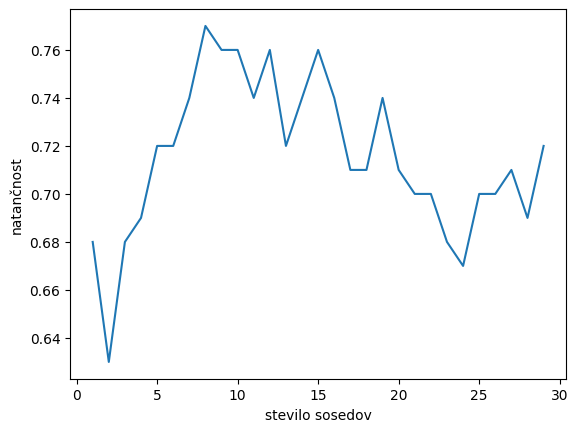

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xtrain_sc = scaler.fit_transform(X_train)
Xtest_sc = scaler.transform(X_test)


acc = []
k_all = list(range(1, 30))
# Zanka, ki teče po številih sosedov, definiranih v k_all
for k in k_all:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xtrain_sc, y_train)
    pred = knn.predict(Xtest_sc)
    accuracy = accuracy_score(y_test, pred)
    acc += [accuracy]

from matplotlib import pyplot as plt

plt.plot(k_all, acc)
plt.xlabel("stevilo sosedov")
plt.ylabel("natančnost")

B.5: Natančnost je mera uspešnosti, ki se pogosto uporablja pri klasifikacijskih problemih. V našem primeru imamo poseben primer klasifikacije, pri katerem ima ciljna spremenljivka samo dva razreda: binarna klasifikacija. Kadar je porazdelitev razredov v podatkih neenakomerna, natančnost ni več dobra mera. V takih primerih si pomagamo z matriko zmede (confusion matrix), preciznostjo in priklicem (precision and recall), ROC krivuljo (ROC curve) ter ploščino pod le-to (ROC-AUC). Izpiši vse našteto za KNN z izbranim k (vsaj 10).

Confusion matrix: 
 [[60  6]
 [18 16]]
Preciznost: 0.7272727272727273
Priklic: 0.47058823529411764
ROC AUC: 0.6898395721925134


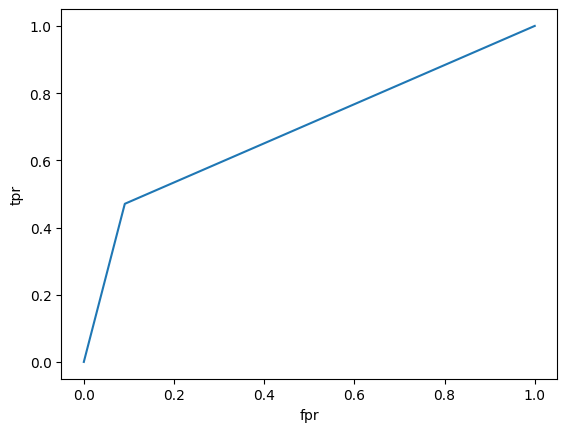

In [27]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(Xtrain_sc, y_train)
pred = knn.predict(Xtest_sc)

# confusion_matrix
from sklearn.metrics import confusion_matrix
CMx = confusion_matrix(y_test, pred)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print('Confusion matrix: \n', CMx)

from sklearn.metrics import precision_score
preciznost = precision_score(y_test, pred)
print('Preciznost:', preciznost)

from sklearn.metrics import recall_score
priklic = recall_score(y_test, pred)
print('Priklic:', priklic)

from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
#print(fpr, tpr, thresholds)
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel("fpr")
plt.ylabel("tpr")

from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, pred)
print('ROC AUC:',roc_auc)

B.DODATNO: Preizkusi še nekaj drugih metod strojnega učenja, npr. logistično regresijo (**sklearn.linear_model.LogisticRegression**), odločitveno drevo (**sklearn.tree.DecisionTreeClassifier**), naključni gozd (**sklearn.ensemble.RandomForestClassifier**) ter metodo podpornih vektorjev (**sklearn.svm.SVC**).

### C: regresija - napovedovanje numerične ciljne spremenljivke
Za nalogo regresije uporabljamo druge metode strojnega učenja kot za klasifikacijo, vendar pa med njimi pogosto obstajajo analogije.
Drugačne so tudi metrike za računanje napake in uspešnosti modelov. Pri regresiji so koristne metrike MSE, RMSE, $R^2$, NMSE, itd.

C.1: Naloži podatke v datoteki "podatki_regresija.csv". Napovedna spremenljivka se imenuje "target", tokrat so podatki že očiščeni. Nauči model linearne regresije (**sklearn.linear_model.LinearRegression**) ter izračunaj njegov RMSE ter $R^2$.

In [29]:
from sklearn.linear_model import LinearRegression
data = pd.read_csv('podatki_regresija.csv')

print(data.head())
X = data.drop('target', axis=1)
Y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
pred = reg.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, pred, squared=False)
print('RMSE:', rmse)

from sklearn.metrics import r2_score
R2 = r2_score(y_test, pred)
print('R2:',R2)

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019908 -0.017646   151.0  
1 -0.039493 -0.068330 -0.092204    75.0  
2 -0.002592  0.002864 -0.025930   141.0  
3  0.034309  0.022692 -0.009362   206.0  
4 -0.002592 -0.031991 -0.046641   135.0  
RMSE: 53.8532569849144
R2: 0.45260660216173787


C.2: Delitev na učno in testno množico ni slab pristop, boljšo oceno napake pa lahko pridobimo s prečnim preverjanjem (k-fold cross-validation). Pri tem postopku podatke razdelimo na k (tipično 5 ali 10) enakih delov. Kot učno množico uporabimo vse razen enega dela, ki služi kot testna množica. Ta postopek izvedemo k-krat, pri čemer na vsaki iteraciji za testno množico razglasimo drug del podatkov. Ponavadi na koncu napake povprečimo. Ker pri prečnem preverjanju učimo model k-krat, je lahko ta postopek zamuden, če imamo zelo veliko podatkov in/ali počasno metodo strojnega učenja.

Z metodo 5-kratnega prečnega preverjanja preizkusi vsaj 3 različne metode ter določi, katera je najboljša za naše podatke. Nekaj predlogov: linearna regresija, podporni vektorji (**sklearn.svm.SVR**), naključni gozd (**sklearn.ensemble.RandomForestRegressor**), najbližji sosedi (**sklearn.neighbor.KNeighborsRegressor**). Pomagaš si lahko s funkcijo **sklearn.model_selection.cross_validate** (preprosta) ali **sklearn.model_selection.KFold** (več nadzora).

In [33]:
from sklearn import linear_model
from sklearn.model_selection import cross_validate
print('Model  |   R2  |   Max Error')
lasso = linear_model.Lasso()
cv = cross_validate(lasso, X, Y, cv=5,
    scoring=('r2', 'max_error'),
    return_train_score=True)
lmR2 = np.mean(cv['test_r2'])
lmMerr = np.mean(cv['test_max_error'])
print('Linearm model:', lmR2, lmMerr)


from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=2, random_state=0)
cvrf = cross_validate(rf, X, Y, cv=5,
    scoring=('r2', 'max_error'),
    return_train_score=True)
RFR2 = np.mean(cvrf['test_r2'])
RFMErr = np.mean(cvrf['test_max_error'])

print('Random Forest:', RFR2, RFMErr)


from sklearn import svm

svm = svm.SVC(kernel='linear', C=1, random_state=42)
cvsvm = cross_validate(svm, X, Y, cv=5,
    scoring=('r2', 'max_error'),
    return_train_score=True)
SVMR2 = np.mean(cvsvm['test_r2'])
SVMMErr = np.mean(cvsvm['test_max_error'])
print('SVM:', SVMR2, SVMMErr)

Model  |   R2  |   Max Error
Linearm model: 0.3375597834274946 -141.4637928818965


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Random Forest: -0.018122186657266327 -198.0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


SVM: -0.21519825777432455 -177.4
